In [1]:
import time
from glob import glob
from tqdm import tqdm
import pandas as pd
from utils import get_hour_crawl_df_lst, get_daily_origin_df_dict
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import numpy as np
from IPython.display import clear_output
from concurrent.futures import ProcessPoolExecutor
import pickle
sns.set_palette("Set1", 7)
sns.color_palette("Set1", 7)

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392)]

In [2]:
def get_date(csv_path):
    return csv_path.split('/')[-1][:6]

In [3]:
sda_path = '/mnt/sda/tnecniv/tnecniv-2023/'
weeks_folder= sorted(glob(sda_path+'*-*/'))
origins_folder = sorted(glob(sda_path+'daily_origin/*.csv'))

In [4]:
first_week_idx = 44
last_week_idx = 46
selected_weeks = weeks_folder[first_week_idx:last_week_idx]
selected_weeks_hour_csv = [csv for week in selected_weeks for csv in sorted(glob(week+'*-*.csv'))]
day_csv_lst = [selected_weeks_hour_csv[24*i:24*(i+1)] for i in range(len(selected_weeks_hour_csv) // 24)]
date_range = [get_date(csv) for csv in [selected_weeks_hour_csv[24*i] for i in range(7*(last_week_idx-first_week_idx))]]
first_day = date_range[0]
last_day = date_range[-1]
day_zero = [get_date(sorted(glob(weeks_folder[first_week_idx-1]+'*-*.csv'))[-1])]
selected_weeks_origins = [origin for origin in origins_folder if get_date(origin) in day_zero + date_range]
origins_df_dict = get_daily_origin_df_dict(selected_weeks_origins)
first_day, last_day

100%|██████████| 14/14 [00:08<00:00,  1.71it/s]


('240519', '240601')

In [5]:
languages = ['en', 'es', 'pt', 'ru', 'de', 'fr', 'ja', 'zh', 'pl', 'it', 'tr', 'th', 'ar', 'cs', 'ko', 'hu', 'uk', 'fi', 'other', 'sv', 'el', 'nl', 'da', 'no', 'zh-hk', 'tl', 'bg', 'ro', 'sk', 'id', 'hi', 'ca', 'asl', 'vi', 'ms']
origins = ['usw22', 'usw23', 'sin03', 'pdx05', 'iad06', 'cmh01', 'ams04', 'muc03', '']
full_language_names = {
    'en': 'English', 'es': 'Spanish', 'pt': 'Portuguese', 'ru': 'Russian', 'de': 'German', 'fr': 'French', 'ja': 'Japanese', 'zh': 'Chinese', 'pl': 'Polish', 'it': 'Italian', 'tr': 'Turkish', 'th': 'Thai', 'ar': 'Arabic', 'cs': 'Czech', 'ko': 'Korean'
}
full_vc_sc = {'vc': '# of Viewers', 'sc': '# of Streamers'}
weekday_names = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
linestyle_dict = {0: 'solid', 1: 'dotted', 2: 'dashed', 3: 'dashdot'}

In [6]:
origin_continent = {
    'as': ['sin03'],
    'eu': ['ams04', 'muc03'],
    'us': ['usw22', 'usw23', 'iad06', 'cmh01', 'pdx05']
}

In [7]:
for origin in origins_folder:
    odict = pd.read_csv(origin, usecols=[0,1], names=['user', 'origin']).groupby('origin').count().to_dict()['user']
    print(origin.split('/')[-1][:6], end=' ')
    for k in odict.keys():
        print((k, odict[k]), end='')
    print()

231204 ('ams04', 107313)('cmh01', 202529)('iad06', 70438)('muc03', 99130)('pdx05', 164836)('sin03', 62286)('usw23', 3)
231205 ('ams04', 141300)('cmh01', 192940)('iad06', 70039)('muc03', 103370)('pdx05', 150500)('sin03', 67223)('usw23', 7)
231206 ('ams04', 142778)('cmh01', 192672)('iad06', 68531)('muc03', 106876)('pdx05', 150463)('sin03', 69293)('usw23', 5395)
231207 ('ams04', 147814)('cmh01', 195415)('iad06', 68745)('muc03', 107428)('pdx05', 163094)('sin03', 68005)('usw23', 3392)
231208 ('ams04', 155860)('cmh01', 190295)('iad06', 69095)('muc03', 114608)('pdx05', 143962)('sin03', 70146)('usw23', 16571)
231209 ('ams04', 165708)('cmh01', 203856)('iad06', 72881)('muc03', 119184)('pdx05', 151380)('sin03', 75155)('usw23', 39596)
231210 ('ams04', 157709)('cmh01', 214308)('iad06', 75231)('muc03', 119960)('pdx05', 135895)('sin03', 73188)('usw23', 41337)
231211 ('ams04', 120864)('cmh01', 215764)('iad06', 75330)('muc03', 108134)('pdx05', 121621)('sin03', 64973)('usw23', 39673)
231212 ('ams04', 12

In [8]:
get_hour_crawl_df_lst(selected_weeks_hour_csv[0], origins_df_dict[get_date(selected_weeks_hour_csv[0])])[0][['origin', 'user_id']].groupby('origin').count().to_dict()['user_id']

{'': 1291,
 'ams04': 25097,
 'cmh01': 16838,
 'iad06': 11477,
 'muc03': 22281,
 'pdx05': 7734,
 'sin03': 17072,
 'usw22': 767,
 'usw23': 796}

In [9]:
# origin_processed = {o:[]  for o in origins}
# for hour_csv in tqdm(selected_weeks_hour_csv):
#     df_lst = get_hour_crawl_df_lst(hour_csv, origins_df_dict[get_date(hour_csv)])
#     for df in df_lst:
#         res = df[['origin', 'user_id']].groupby('origin').count().to_dict()['user_id']
#         for o in origins:
#             origin_processed[o].append(res[o])
# with open('./result_collection/lofiltering_2405/origin_processed.pickle', 'wb') as f:
#     pickle.dump(origin_processed, f, protocol=pickle.HIGHEST_PROTOCOL)
with open('./result_collection/lofiltering_2405/origin_processed.pickle', 'rb') as f:
    origin_processed = pickle.load(f)

In [10]:
df = pd.DataFrame(origin_processed).T
df.insert(0, 'Avg', df.sum(axis=1))
df = df['Avg'].drop('').to_frame()
total = df.sum(axis=0)['Avg']
df['Percentage'] = df['Avg'] / total * 100
df

,Avg,Percentage
usw22,2224255,1.201724
usw23,2217111,1.197864
sin03,16333983,8.824951
pdx05,36620760,19.785524
iad06,18223802,9.845985
cmh01,50653383,27.367092
ams04,31484663,17.010585
muc03,27330701,14.766275


In [11]:
lang_ori_result = {(l, o):{'vc':[], 'sc':[]} for l in languages for o in origins}

def get_lang_ori_user_count(day_csv):
    res = {(l, o):{'vc':[], 'sc':[]} for l in languages for o in origins}
    for csv in day_csv:
        date = get_date(csv)
        df_lst = get_hour_crawl_df_lst(csv, origins_df_dict[date])
        for df in df_lst:
            grouped_by_lang_ori = df[['user_id', 'language', 'viewer_count', 'origin']].groupby(['language', 'origin'])
            lo_vc = grouped_by_lang_ori.sum('viewer_count').to_dict()['viewer_count']
            lo_sc = grouped_by_lang_ori.count().to_dict()['user_id']
            for l in languages:
                for o in origins:
                    try:
                        res[(l, o)]['vc'].append(lo_vc[(l, o)])
                        res[(l, o)]['sc'].append(lo_sc[(l, o)])
                    except:
                        res[(l, o)]['vc'].append(0)
                        res[(l, o)]['sc'].append(0)
    return res

with ProcessPoolExecutor(max_workers=5) as executor:
    for res in list(tqdm(executor.map(get_lang_ori_user_count, day_csv_lst), total=len(day_csv_lst))):
        for l in languages:
            for o in origins:
                lang_ori_result[(l, o)]['vc'].extend(res[(l, o)]['vc'])
                lang_ori_result[(l, o)]['sc'].extend(res[(l, o)]['sc'])

100%|██████████| 14/14 [04:21<00:00, 18.65s/it]


In [12]:
# with open('./result_collection/lofiltering_2405/lang_ori_result.pickle', 'wb') as f:
#     pickle.dump(lang_ori_result, f, protocol=pickle.HIGHEST_PROTOCOL)
with open('./result_collection/lofiltering_2405/lang_ori_result.pickle', 'rb') as f:
    lang_ori_result = pickle.load(f)

In [13]:
def plot_lang_ori_results(lang, ori_title='all', tz=8, total=False, user_stat = 'all', loc=['best', 'best']):
    
    if(ori_title == 'all'):
        ori = origins
    if(ori_title == 'us'):
        ori = origin_continent['us']
    elif(ori_title == 'as'):
        ori = origin_continent['as']
    elif(ori_title == 'eu'):
        ori = origin_continent['eu']
    
    ori_title_translate = {'us': 'American', 'as': 'Asian', 'eu': 'European', 'all': 'all'}
    ax_lst = []
    fig_lst = []
    no_weeks = last_week_idx - first_week_idx

    if(user_stat == 'all' or user_stat == 'sc'):
        if(total):
            temp = np.zeros(144*7*(no_weeks))
            for o in ori:
                temp += np.array(lang_ori_result[(lang, o)]['sc'])
            fig2, ax2 = plt.subplots(1, figsize=(18, 7))
            ax_lst.append(ax2)
            fig_lst.append(fig2)
            for j in range(7*(no_weeks)):
                ax2.plot(temp[144*j+(8-tz)*6:144*(j+1)+(8-tz)*6], linestyle = linestyle_dict[j//7])
                ax2.set_title(f"({full_language_names[lang]}, {ori_title_translate[ori_title]} origins) daily stream count | {first_day}~{last_day} | UTC{tz:+}")
                ax2.set_xticks(np.arange(0, 144, 6), (np.arange(0, 144, 6)/6).astype(int))
                ax2.set_xlabel('time')
                ax2.set_ylabel('stream count')
        for o in ori:
            if(o==''): continue
            fig1, ax1 = plt.subplots(1, figsize=(18, 7))
            ax_lst.append(ax1)
            fig_lst.append(fig1)
            for j in range(7*(no_weeks)):
                ax1.plot(lang_ori_result[(lang, o)]['sc'][144*j+(8-tz)*6:144*(j+1)+(8-tz)*6], linestyle = linestyle_dict[j//7])
                ax1.set_title(f"({full_language_names[lang]}, {o}) daily stream count | {first_day}~{last_day} | UTC{tz:+}")
                ax1.set_xticks(np.arange(0, 144, 6), (np.arange(0, 144, 6)/6).astype(int))
                ax1.set_xlabel('time')
                ax1.set_ylabel('stream count')

    if(user_stat == 'all' or user_stat == 'vc'):
        if(total):
            temp = np.zeros(144*7*(no_weeks))
            for o in ori:
                temp += np.array(lang_ori_result[(lang, o)]['vc'])
            fig4, ax4 = plt.subplots(1, figsize=(18, 7))
            ax_lst.append(ax4)
            fig_lst.append(fig4)
            for j in range(7*(no_weeks)):
                ax4.plot(temp[144*j+(8-tz)*6:144*(j+1)+(8-tz)*6], linestyle = linestyle_dict[j//7])
                ax4.set_title(f"({full_language_names[lang]}, {ori_title_translate[ori_title]} origins) daily viewer count | {first_day}~{last_day} | UTC{tz:+}")
                ax4.set_xticks(np.arange(0, 144, 6), (np.arange(0, 144, 6)/6).astype(int))
                ax4.set_xlabel('time')
                ax4.set_ylabel('viewer count')
        for o in ori:
            if(o==''): continue
            fig3, ax3 = plt.subplots(1, figsize=(18, 7))
            ax_lst.append(ax3)
            fig_lst.append(fig3)      
            for j in range(7*(no_weeks)):
                ax3.plot(lang_ori_result[(lang, o)]['vc'][144*j+(8-tz)*6:144*(j+1)+(8-tz)*6], linestyle = linestyle_dict[j//7])
                ax3.set_title(f"({full_language_names[lang]}, {o}) daily viewer count | {first_day}~{last_day} | UTC{tz:+}")
                ax3.set_xticks(np.arange(0, 144, 6), (np.arange(0, 144, 6)/6).astype(int))
                ax3.set_xlabel('time')
                ax3.set_ylabel('viewer count')

    for ax in ax_lst:
        for i in range(7):
            ax.plot([], label=weekday_names[i])
        ls_collection = []
        for i in range(no_weeks):
            line, = ax.plot([], linestyle = linestyle_dict[i], c='black')
            ls_collection.append(line)
        ax.add_artist(ax.legend(ls_collection, [f'{date_range[7*i]} ~ {date_range[7*i+6]}' for i in range(no_weeks)], loc=loc[0]))
        ax.legend(loc=loc[1])
    for fig in fig_lst:
        fig.tight_layout()
    plt.show()

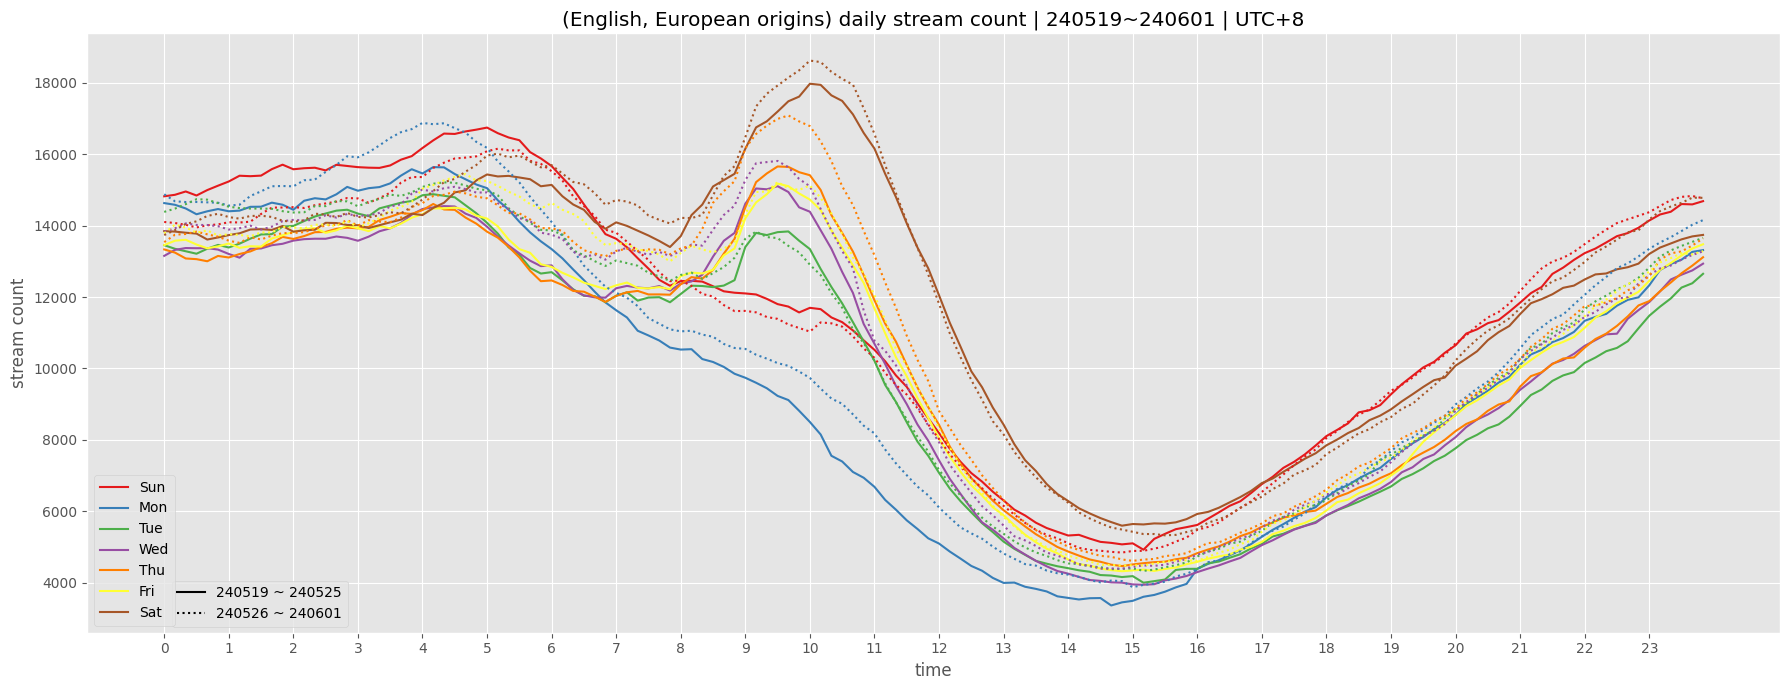

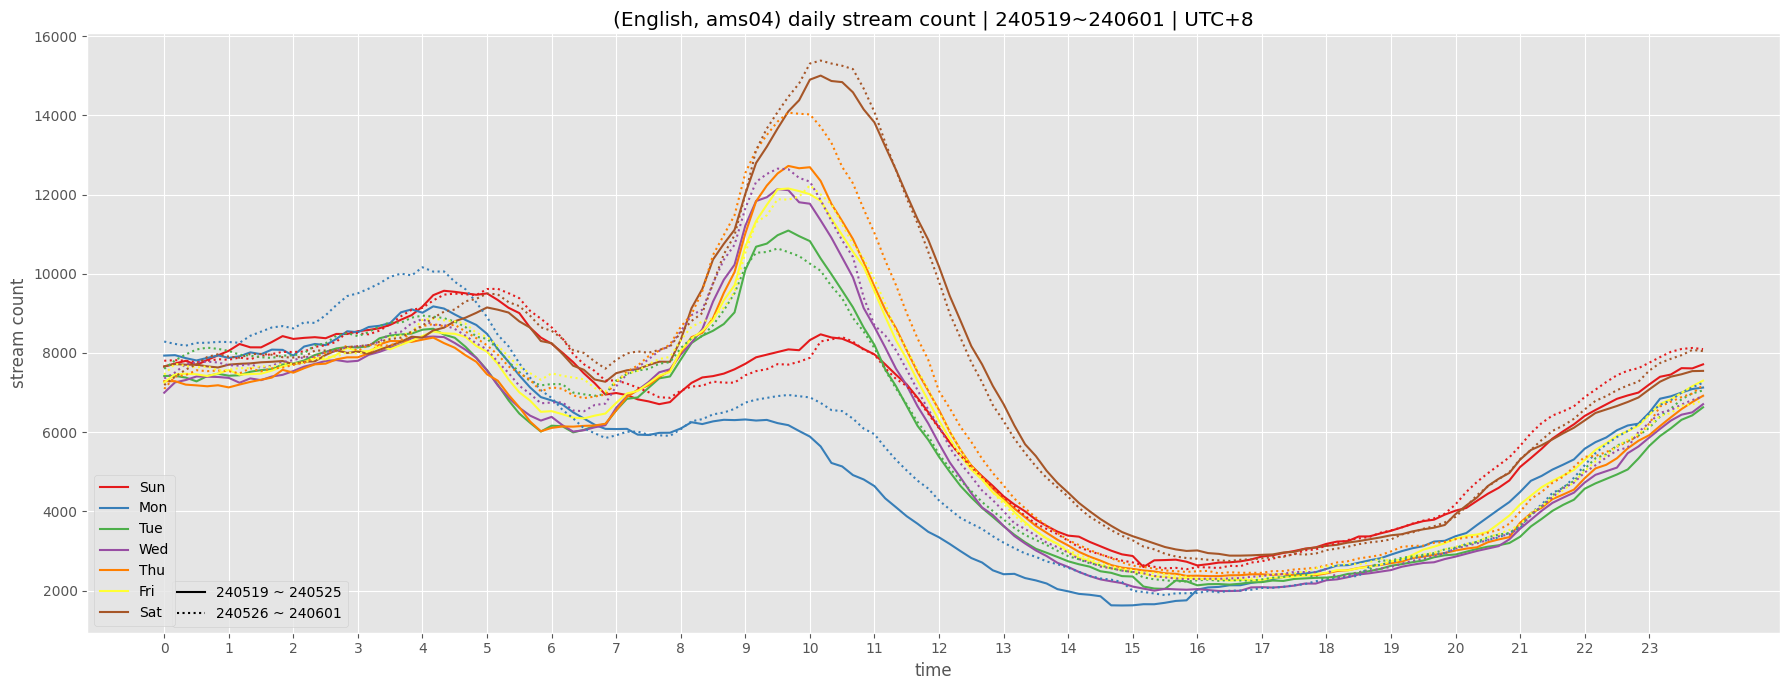

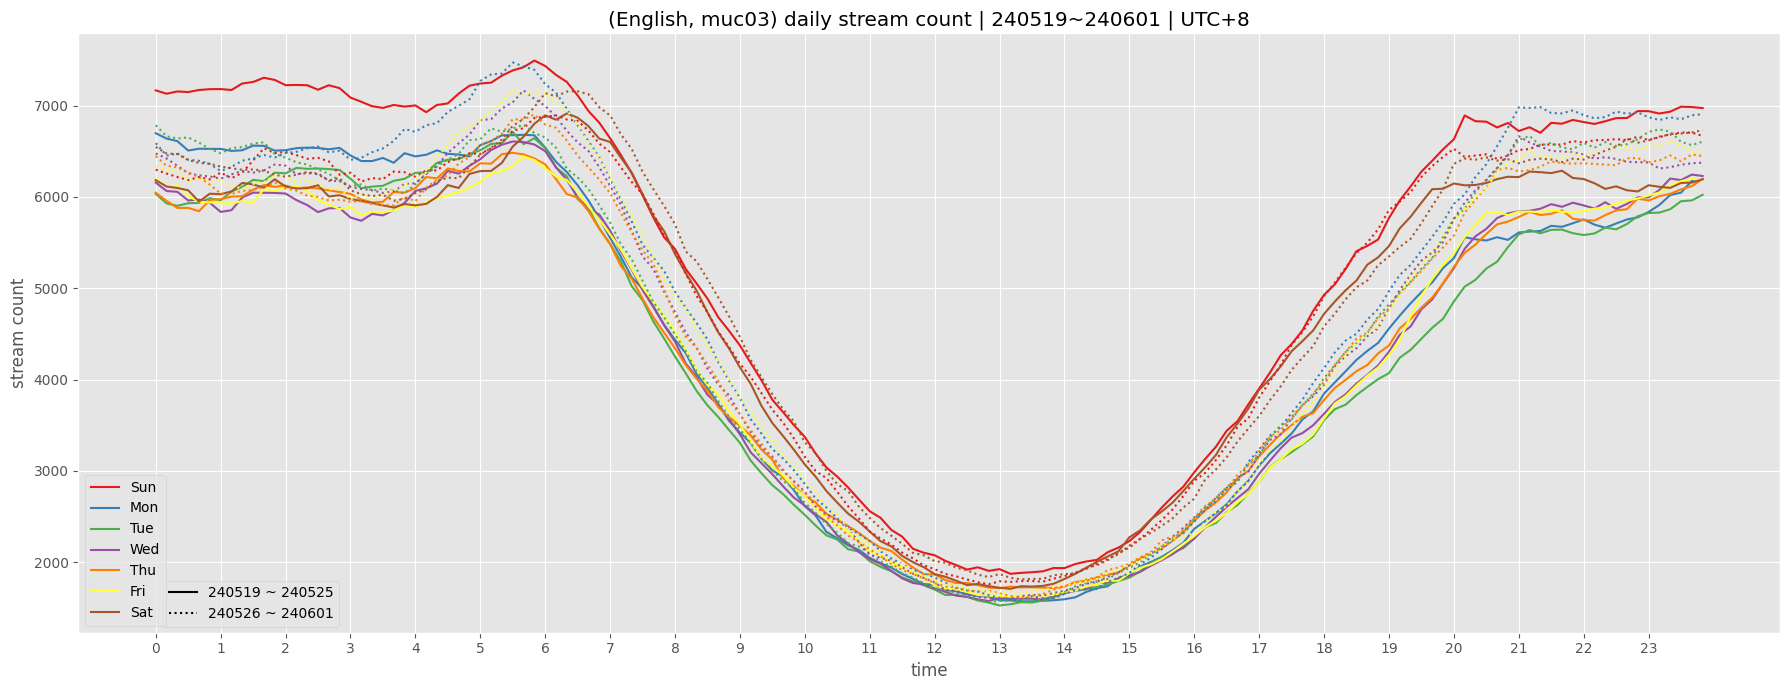

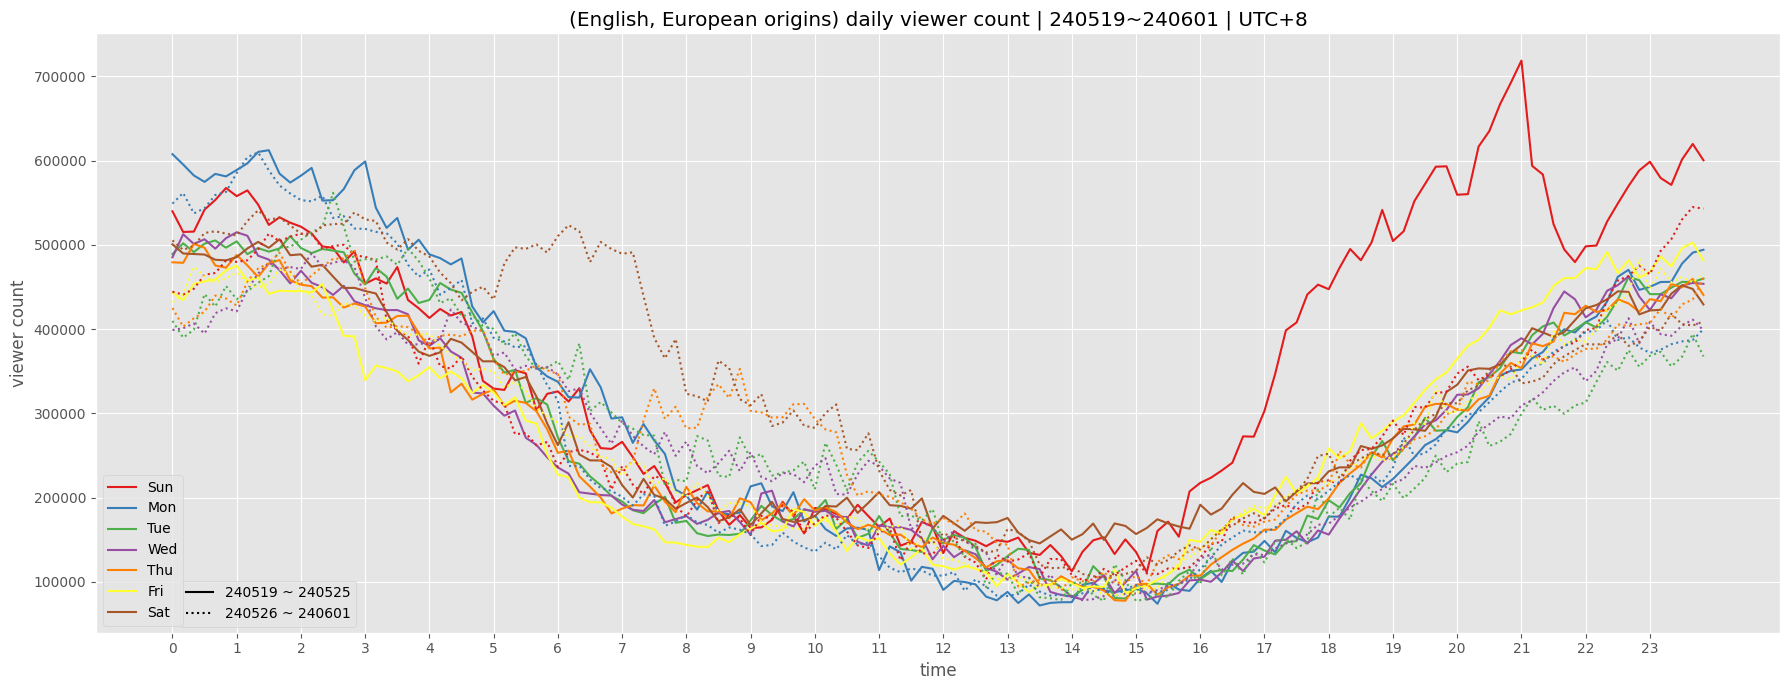

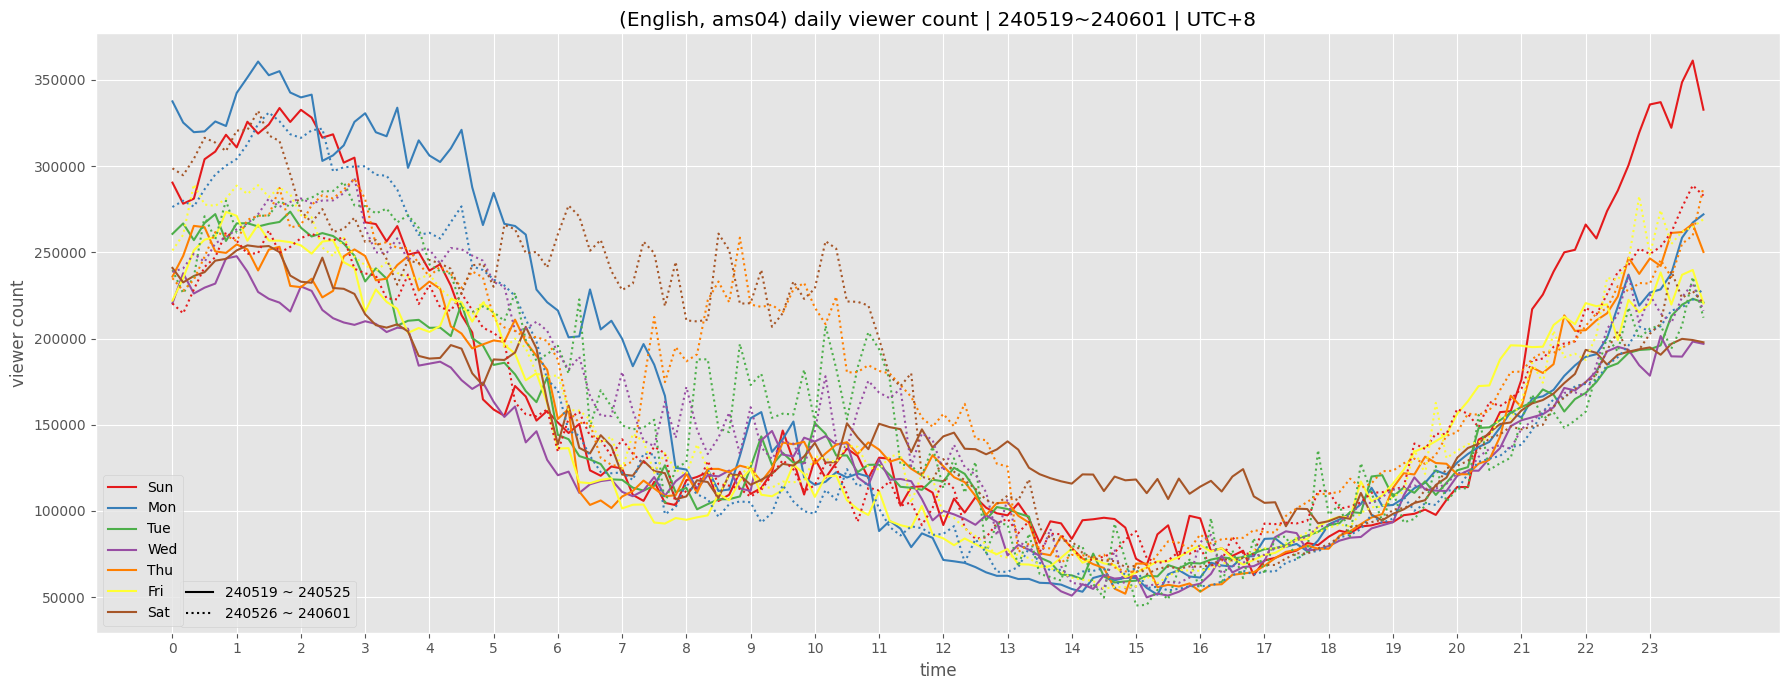

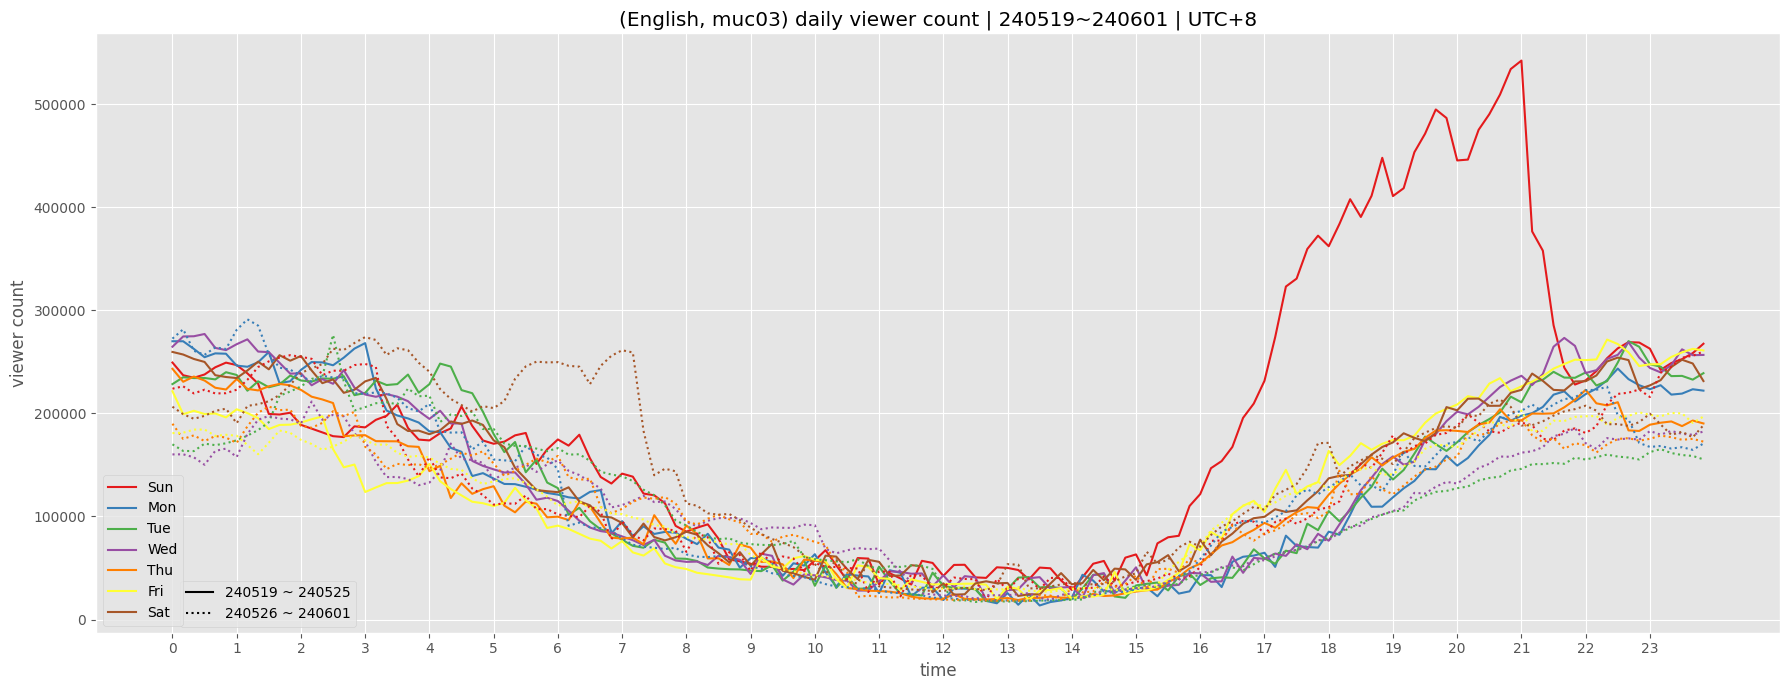

In [14]:
plot_lang_ori_results('en', tz=8, total=True, user_stat='all', ori_title='eu', loc=[(0.05, .01), 'lower left'])